<h1>Evaluation</h1>
<h2>Notes</h2>

Evaluate Queries based on Class/Distances

Different metrics
1) Truth Table -> How many of class c are returned given query size s. Incooperate distance measure as confidence metric. 
2) Mean Average Precision
3) Last Rank -> Last True Positive
4) ROC-Curve ANN system vs custom system (compare different distance metrics) - AUROC - invariant to query size
5) Confusion Matrix of Class Search -> weighed by inverse distance

Ideas: Measure inter-class distance according to our metric



In [1]:
import pandas as pd
from matplotlib import figure
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
from tqdm import tqdm

In [2]:
distances = np.load("custom_distances.npz")
for key in distances.keys():
    print(key)

print(distances["dist"].shape)

distances_ann = np.load("ann_distances.npz")
for key in distances_ann.keys():
    print(key)

print(distances_ann["dist"].shape)


dist
(2419, 2419)
idx
dist
(2419, 2419)


In [11]:
df = pd.read_csv("normCorrMetadata.csv")
print(df.shape)

(2419, 20)


In [7]:

# Step 1: Get the unique classes
unique_classes = df['Class'].unique()

# Step 2: Create a DataFrame to store the average distances between each class pair

def get_average_classwise_distances(distances,limit):
    average_distances = pd.DataFrame(index=unique_classes, columns=unique_classes)

    i=0
    # Step 3: Calculate the average distance for each class pair

    for class1 in tqdm(unique_classes, desc=f"Processing Class Pairs"):
        print(class1)
        for class2 in unique_classes:
            
            # Get the indices of objects in each class
            indices_class1 = np.array(df[df['Class'] == class1].index)
            indices_class2 = np.array(df[df['Class'] == class2].index)
            
            # Extract distances between objects in class1 and class2
            ixgrid = np.ix_(indices_class1, indices_class2)
            mean_distance = np.mean(distances["dist"][ixgrid])
            # Store the mean distance in the matrix
            average_distances.loc[class1, class2] = mean_distance
            i+=1
            if(limit!=None and i>limit):
                return average_distances.astype(float)

    # Step 4: Convert the DataFrame to float (in case of NaNs) for plotting
    average_distances = average_distances.astype(float)
    return average_distances

#average_distances_custom = get_average_classwise_distances(distances,limit=None)
#average_distances_custom.to_csv("average_distances_custom.csv")


#average_distances_ann = get_average_classwise_distances(distances_ann,limit=None)
#average_distances_ann.to_csv("average_distances_ann.csv")

#print(average_distances_custom.head)
#print(average_distances_ann.head)

In [55]:
def normalize_distances(distances,limit=None):
    #Normalize distances by number of class members
    norm = np.zeros(distances.shape)
    print(distances.shape)
    normvec = np.zeros(distances.shape[0])
    for i in range(0,len(distances)):
        cls = df.iloc[i]["Class"]
        clscount = df["Class"].value_counts()[cls]
        normvec[i]=1/clscount
    
    for i in range(0,len(distances)):
        norm[i]=distances[i]*normvec
        if(limit!=None and i>limit):
            break
    np.save(file="normalized_distances",arr=norm)
    return norm


def get_item_probabilities(distances,limit):
    item_prob = pd.DataFrame(index=df.index, columns=unique_classes)
    
    for idx,item in df.iterrows():
        return
    for class1 in tqdm(unique_classes, desc=f"Processing Class Pairs"):
        print(class1)
        for class2 in unique_classes:
            
            # Get the indices of objects in each class
            indices_class1 = np.array(df[df['Class'] == class1].index)
            indices_class2 = np.array(df[df['Class'] == class2].index)
            
            # Extract distances between objects in class1 and class2
            ixgrid = np.ix_(indices_class1, indices_class2)
            mean_distance = np.mean(distances["dist"][ixgrid])
            # Store the mean distance in the matrix
            average_distances.loc[class1, class2] = mean_distance
            i+=1
            if(limit!=None and i>limit):
                return average_distances.astype(float)

    # Step 4: Convert the DataFrame to float (in case of NaNs) for plotting
    average_distances = average_distances.astype(float)
    return average_distances

print(normalize_distances(distances["dist"],limit=None))

(2419, 2419)
[[-0.4704141  -0.09134047  0.99196904 ...  0.90267401  0.84958755
   0.60427121]
 [-0.09134047 -0.4704141   0.93444187 ...  0.93517617  0.8695412
   0.6359126 ]
 [ 0.99196904  0.93444187 -0.4704141  ...  0.58892886  0.4203657
   0.64614888]
 ...
 [ 1.20356534  1.24690156  0.78523849 ... -0.35281057 -0.02871076
   0.08360423]
 [ 1.1327834   1.15938826  0.5604876  ... -0.02871076 -0.35281057
   0.06550089]
 [ 0.80569495  0.84788347  0.86153184 ...  0.08360423  0.06550089
  -0.35281057]]


In [56]:
normalized_distances = np.array(np.load("normalized_distances.npy"))
print(normalized_distances)

[[-0.4704141  -0.09134047  0.99196904 ...  0.90267401  0.84958755
   0.60427121]
 [-0.09134047 -0.4704141   0.93444187 ...  0.93517617  0.8695412
   0.6359126 ]
 [ 0.99196904  0.93444187 -0.4704141  ...  0.58892886  0.4203657
   0.64614888]
 ...
 [ 1.20356534  1.24690156  0.78523849 ... -0.35281057 -0.02871076
   0.08360423]
 [ 1.1327834   1.15938826  0.5604876  ... -0.02871076 -0.35281057
   0.06550089]
 [ 0.80569495  0.84788347  0.86153184 ...  0.08360423  0.06550089
  -0.35281057]]


In [14]:
average_distances_custom=pd.read_csv("average_distances_custom.csv",index_col=0)
average_distances_ann=pd.read_csv("average_distances_ann.csv",index_col=0)

#average_distances_custom.set_index('Unnamed: 0', inplace=True)

print(average_distances_custom.head())

                 AircraftBuoyant  Apartment  AquaticAnimal        Bed  \
AircraftBuoyant         7.794111  11.213063      11.561963  15.063545   
Apartment              11.213063   8.281840      14.771581  10.917488   
AquaticAnimal          11.561963  14.771581       5.483063  19.355979   
Bed                    15.063545  10.917488      19.355979   6.395035   
Bicycle                 9.473267  10.717883       7.285025  13.519353   

                   Bicycle    Biplane       Bird    Bookset     Bottle  \
AircraftBuoyant   9.473267   9.458107  10.325726  14.795388   8.337859   
Apartment        10.717883  11.216662  12.784789  11.541870  11.491189   
AquaticAnimal     7.285025   7.163944   6.742195  20.405176   9.241311   
Bed              13.519353  15.253725  17.242618  15.317663  15.386828   
Bicycle          -0.118838   3.046345   5.165153  16.035365   7.995078   

                 BuildingNonResidential  ...      Sword       Tool      Train  \
AircraftBuoyant               11.97

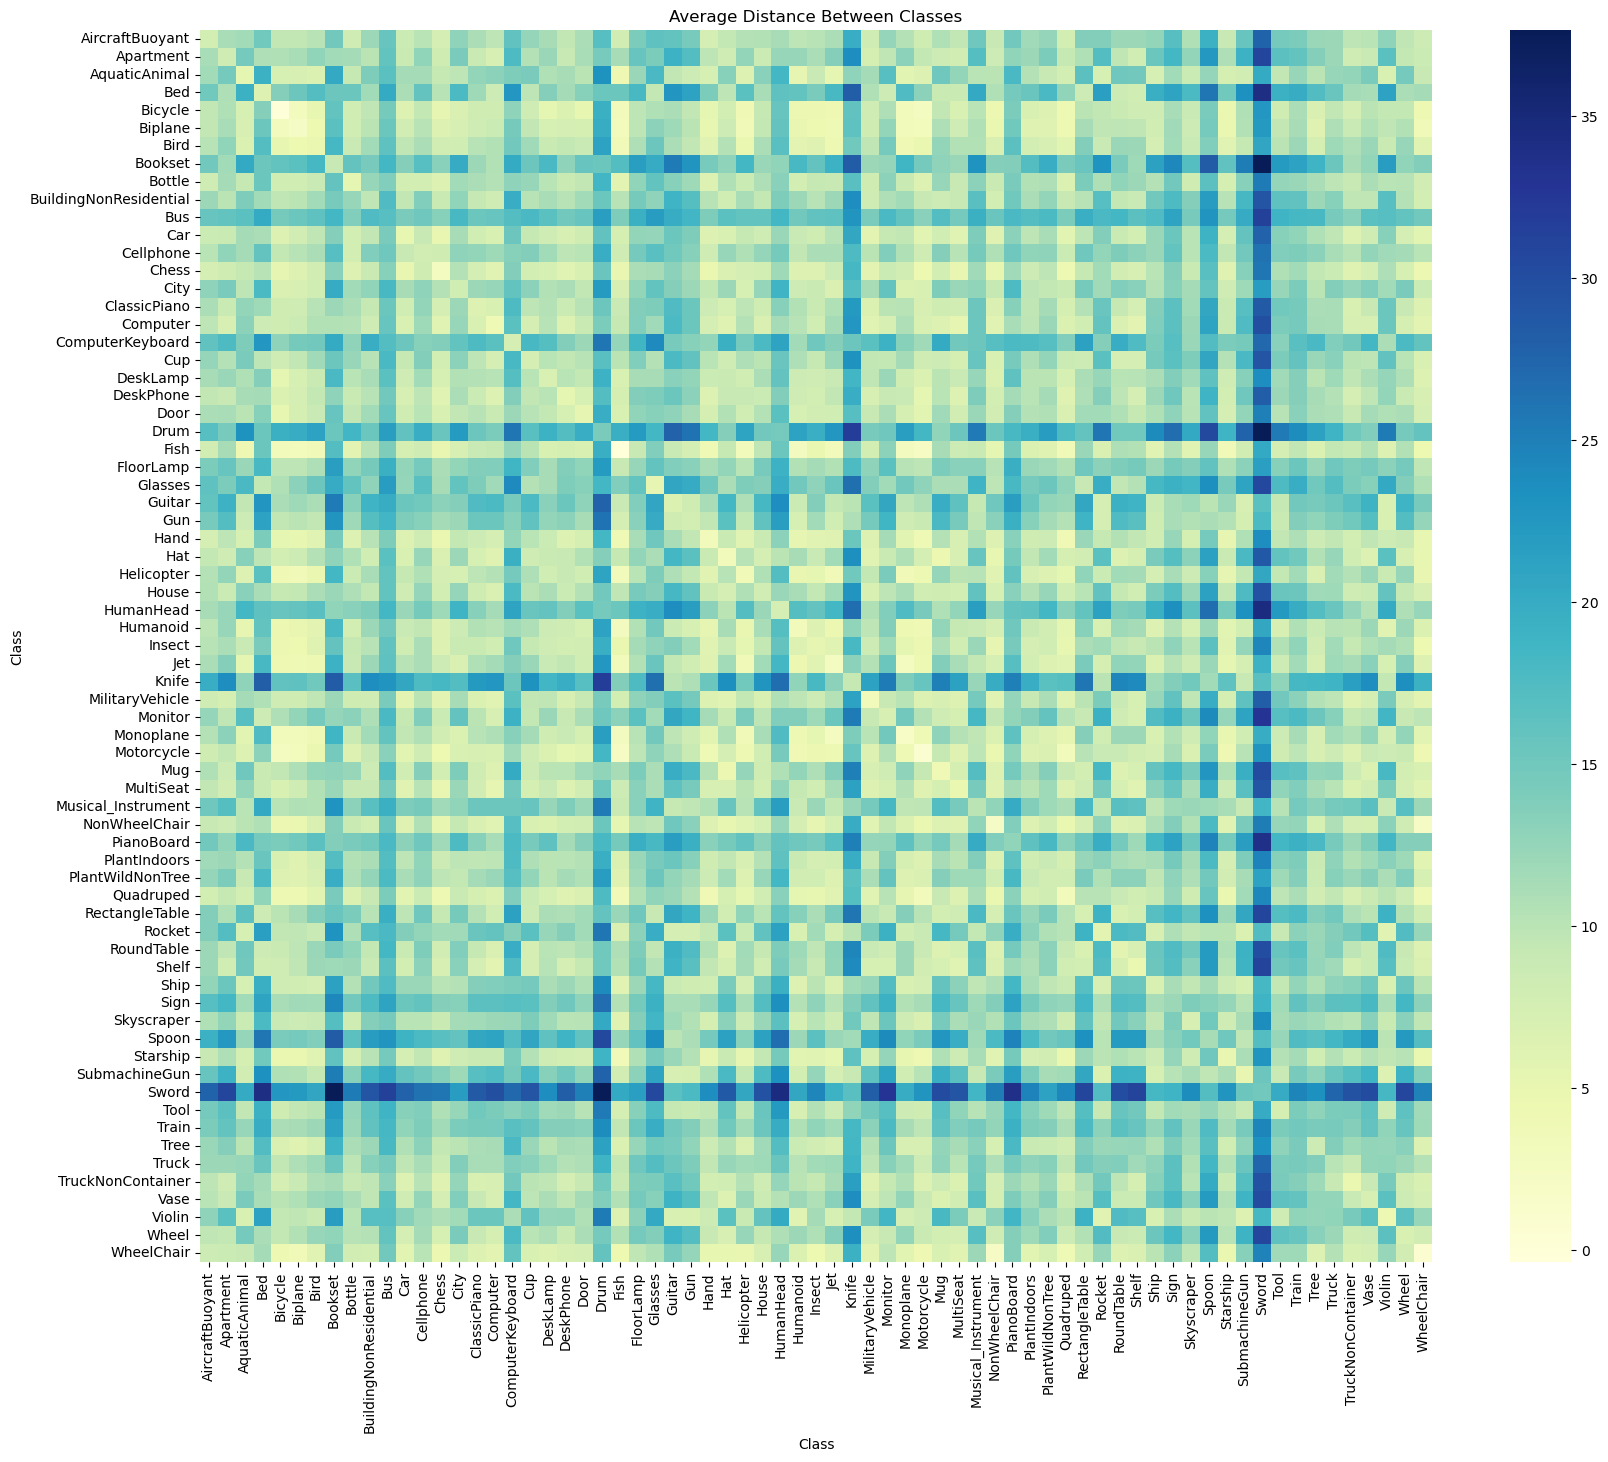

In [15]:

# Step 5: Plot the confusion matrix for average distances
plt.figure(figsize=(20, 16))
sns.heatmap(average_distances_custom, square=True,annot=False, cmap="YlGnBu", fmt=".2f",cbar_kws={'format': '%.0f'})
plt.title("Average Distance Between Classes")
plt.xlabel("Class")
plt.ylabel("Class")
plt.show()

AircraftBuoyant      7.547413
Apartment            7.109260
AquaticAnimal        4.160893
Bed                  6.395035
Bicycle             -0.118838
                       ...   
TruckNonContainer    4.836242
Vase                 6.582074
Violin               4.330343
Wheel                6.983127
WheelChair           0.764085
Length: 69, dtype: float64


In [26]:
count = 0
for idx,row in average_distances_custom.iterrows():
    rowmin = np.argmin(row)
    if(idx!=average_distances_custom.columns[rowmin]):
        print(idx,average_distances_custom.columns[rowmin],row[rowmin])
    else:
         count+=1
print(count)
    

AircraftBuoyant Hand 7.547412819217761
Apartment Computer 7.109259973939395
AquaticAnimal Fish 4.160892564658349
Bird Fish 3.780315385432925
BuildingNonResidential NonWheelChair 7.729190278010827
Bus TruckNonContainer 13.256563563718904
Car Chess 5.117300205495102
Cellphone Bottle 7.751379506389983
City Monoplane 6.647634149323657
ClassicPiano WheelChair 6.337044927972251
Cup NonWheelChair 6.989626494382224
DeskLamp Bicycle 5.449383929089352
Door Bicycle 5.191157058991329
Drum Mug 12.837337539208294
FloorLamp Fish 9.1208228716565
Gun Violin 7.035757703126291
Helicopter Fish 3.2445731754377225
House Computer 6.842842538180549
Humanoid Fish 2.788566523334056
Insect Biplane 4.390575136384185
Knife SubmachineGun 9.121017371364276
Musical_Instrument Fish 8.833709685606124
NonWheelChair WheelChair 2.0961679392099293
PianoBoard Computer 11.082444902804813
PlantIndoors WheelChair 5.774910963455043
PlantWildNonTree Biplane 6.173315567794683
RectangleTable RoundTable 7.020889216340501
Ship Fish 

['PlantIndoors', 'HumanHead', 'Chess', 'Sword', 'Biplane', 'Hand', 'Quadruped', 'Tool', 'Door', 'Jet']


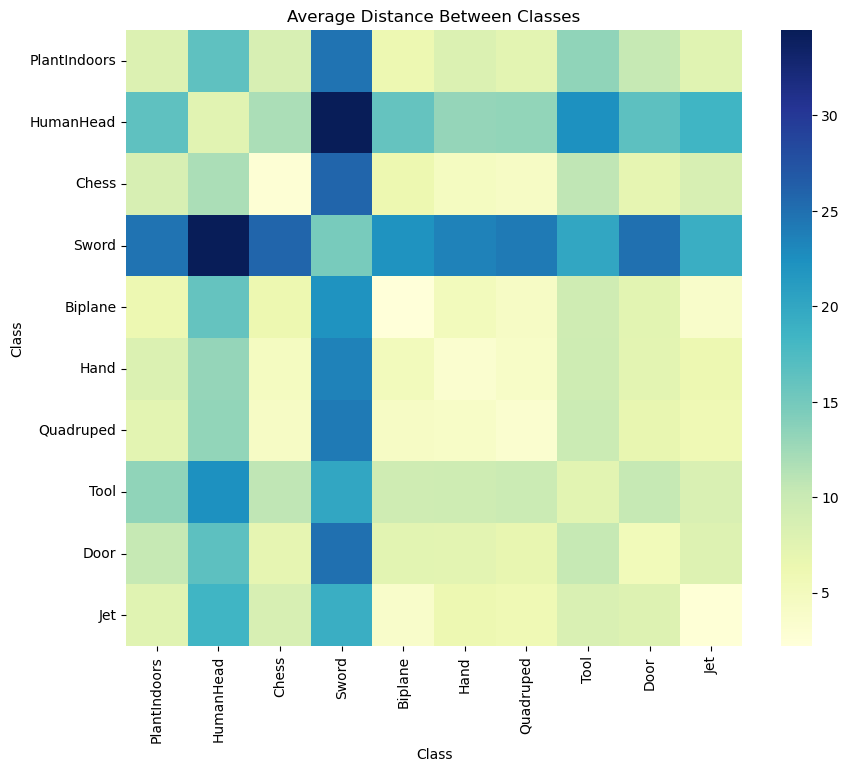

In [22]:
# Step 5: Plot the confusion matrix for average distances
plt.figure(figsize=(10, 8))

selected_classes = ["PlantIndoors","HumanHead","Chess","Sword","Biplane","Hand","Quadruped","Tool","Door","Jet"]  # replace with the actual class names you want to include

print(selected_classes)
# Step 2: Create a DataFrame to store the average distances between each selected class pair
subset_df = average_distances_custom.loc[selected_classes, selected_classes]
sns.heatmap(subset_df, square=True,annot=False, cmap="YlGnBu", fmt=".2f",cbar_kws={'format': '%.0f'})
plt.title("Average Distance Between Classes")
plt.xlabel("Class")
plt.ylabel("Class")
plt.show()

['Fish', 'Bird', 'FloorLamp', 'Helicopter', 'Humanoid', 'Musical_Instrument', 'Ship', 'Skyscraper', 'Train', 'AquaticAnimal']


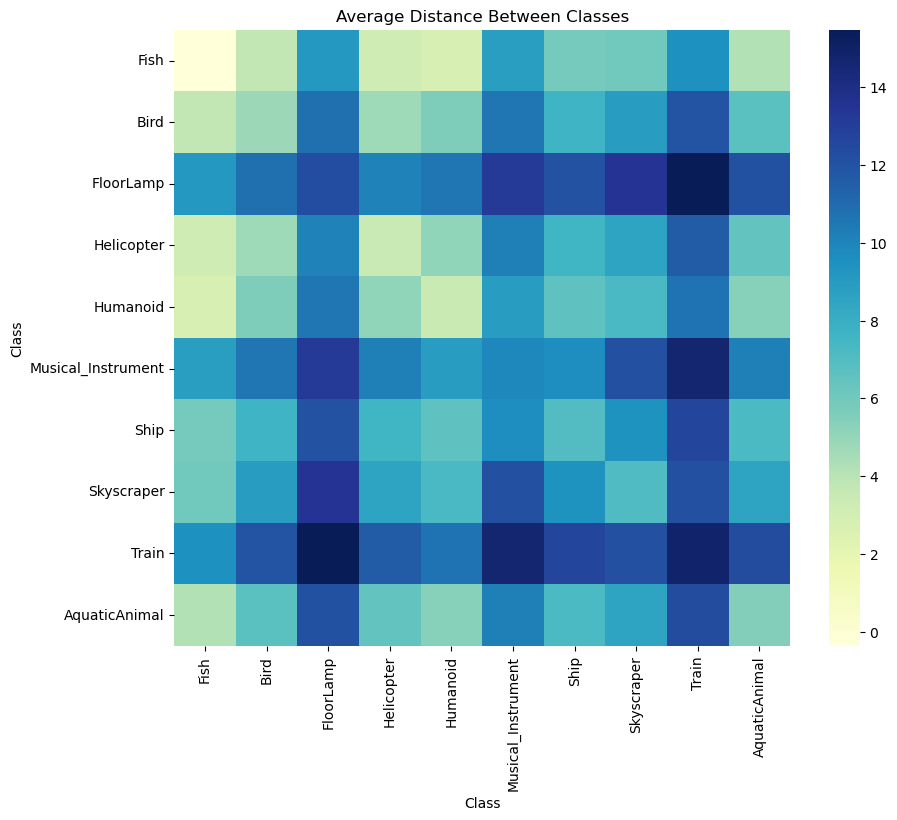

In [28]:
 # Step 5: Plot the confusion matrix for average distances
plt.figure(figsize=(10, 8))

selected_classes = ["Fish","Bird","FloorLamp","Helicopter","Humanoid","Musical_Instrument","Ship","Skyscraper","Train","AquaticAnimal"]  # replace with the actual class names you want to include

print(selected_classes)
# Step 2: Create a DataFrame to store the average distances between each selected class pair
subset_df = average_distances_custom.loc[selected_classes, selected_classes]
sns.heatmap(subset_df, square=True,annot=False, cmap="YlGnBu", fmt=".2f",cbar_kws={'format': '%.0f'})
plt.title("Average Distance Between Classes")
plt.xlabel("Class")
plt.ylabel("Class")
plt.show()

<H1>ROC Curve and AUC Measure</H1>

In [57]:
from sklearn import metrics

In [92]:
distances = np.load("custom_distances.npz")["dist"]
distances_ann = np.load("ann_distances.npz")["dist"]
df = pd.read_csv("mesh_features.csv")
print(df.shape)

(2419, 309)


In [5]:
def get_item_probabilities(distances,limit):
    unique_classes = df['class'].unique()
    i = 0
    item_prob = pd.DataFrame(index=df.index, columns=unique_classes)
    hits = np.zeros(distances.shape)
    for class1 in tqdm(unique_classes, desc=f"Processing Class Pairs"):
        class_indices = np.array(df[df["class"]==class1].index)
        rows, cols = np.ix_(class_indices, class_indices)
        print(class1,class_indices)
        hits[rows, cols] = 1
        i+=1
        if(limit!=None and i>limit):
            return hits

    # Step 4: Convert the DataFrame to float (in case of NaNs) for plotting
    return hits
y_true = get_item_probabilities(distances,limit=None)


Processing Class Pairs: 100%|██████████| 69/69 [00:00<00:00, 841.23it/s]

AircraftBuoyant [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
Apartment [15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
AquaticAnimal [38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61
 62 63 64 65 66]
Bed [67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90
 91 92 93]
Bicycle [ 94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111
 112 113 114 115 116 117 118 119]
Biplane [120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155
 156 157 158 159 160 161 162 163]
Bird [164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181
 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199
 200 201 202 203 204 205 206]
Bookset [207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224]
Bottle [225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242
 243 244 245 246 2

In [6]:
distances += np.abs(distances[0,0])
print(distances[1,1])

0.0


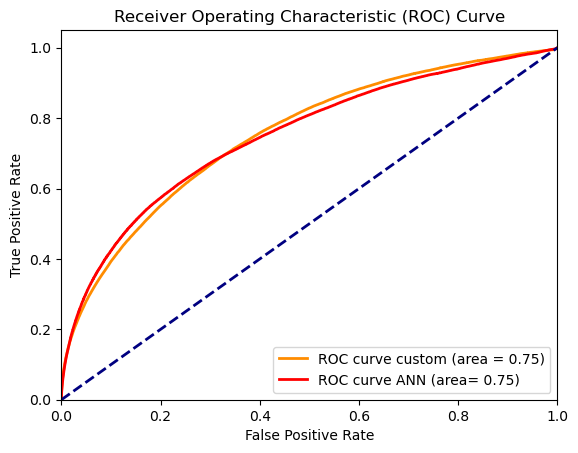

In [94]:

distances_ann_flat = distances_ann[np.triu_indices_from(distances_ann, k=1)]

distances_flat = distances[np.triu_indices_from(distances, k=1)]
hits_flat = y_true[np.triu_indices_from(y_true, k=1)]


fpr, tpr, thresholds = metrics.roc_curve(hits_flat, -distances_flat)  # Negative distances for similarity
roc_auc = metrics.auc(fpr, tpr)

fpr_ann, tpr_ann, thresholds_ann = metrics.roc_curve(hits_flat, -distances_ann_flat)  # Negative distances for similarity
roc_auc_ann = metrics.auc(fpr_ann, tpr_ann)


# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve custom (area = {roc_auc:.2f})')
plt.plot(fpr_ann, tpr_ann, color='red', lw=2, label=f'ROC curve ANN (area= {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [3]:
distances = np.load("custom_distances.npz")["dist"]
distances_ann = np.load("ann_distances.npz")["dist"]
df = pd.read_csv("mesh_features.csv")

In [58]:
def get_k_res(distances,hits,limit=None,k=12):
    i=0
    truthTable = pd.DataFrame(index=list(range(0,len(distances))),columns=["TP","TN","FP","FN","Class"])
    for i in range(0,len(distances)): 
        idx = np.argpartition(distances[i], k)[0:k]
        thits = hits[i][idx]
        #print(idx,thits)

        TP = max (0, np.sum(thits)-1)
        FP = len(thits)-TP
        FN = np.sum(hits[i])-TP
        TN = len(hits[i])-FN-FP-TP
        cls = df.iloc[i]["class"]
        #print(TP,FP,TN,FN)
        dictionary = {"TP":TP,"TN":TN,"FP":FP,"FN":FN,"Class":cls}
        truthTable.iloc[i] = pd.Series(dictionary)
        i+=1
        if(limit!=None and i>limit):
            break
    truthTable.to_csv("truthtable.csv")
    return truthTable

def calculate_metrics(df):
        
    # Calculate metrics
    df['Accuracy'] = (df['TP'] + df['TN']) / (
        df['TP'] + df['FP'] + df['TN'] + df['FN']
    )
    df['Precision'] = df['TP'] / (df['TP'] + df['FP'])
    df['Recall'] = df['TP'] / (df['TP'] + df['FN'])
    df['F1'] = 2 * (df['Precision'] * df['Recall']) / (
        df['Precision'] + df['Recall']
    )
    return df



In [59]:
truthTable_k12 = get_k_res(distances,y_true,limit=None,k=12)
truthTable_k12 = calculate_metrics(truthTable_k12)     

truthTable_k12_ann = get_k_res(distances_ann,y_true,limit=None,k=12)
truthTable_k12_ann = calculate_metrics(truthTable_k12_ann)

truthTable_k6 = get_k_res(distances,y_true,limit=None,k=6)
truthTable_k6 = calculate_metrics(truthTable_k6)

truthTable_k6_ann = get_k_res(distances_ann,y_true,limit=None,k=6)
truthTable_k6_ann = calculate_metrics(truthTable_k6_ann)

truthTable_k2 = get_k_res(distances,y_true,limit=None,k=2)
truthTable_k2 = calculate_metrics(truthTable_k2)

truthTable_k2_ann = get_k_res(distances_ann,y_true,limit=None,k=2)
truthTable_k2_ann = calculate_metrics(truthTable_k2_ann)

print(truthTable_k12.head())

    TP      TN    FP    FN            Class  Accuracy Precision    Recall  \
0  1.0  2393.0  11.0  14.0  AircraftBuoyant  0.989665  0.083333  0.066667   
1  1.0  2393.0  11.0  14.0  AircraftBuoyant  0.989665  0.083333  0.066667   
2    0  2392.0    12  15.0  AircraftBuoyant  0.988838       0.0       0.0   
3    0  2392.0    12  15.0  AircraftBuoyant  0.988838       0.0       0.0   
4    0  2392.0    12  15.0  AircraftBuoyant  0.988838       0.0       0.0   

         F1  
0  0.074074  
1  0.074074  
2       NaN  
3       NaN  
4       NaN  


In [60]:
# Plot using seaborn
truthTable_k12['Model'] = 'Custom - k=12'
truthTable_k12_ann['Model'] = 'Ann - k=12'
truthTable_k6['Model'] = 'Custom - k=6'
truthTable_k6_ann['Model'] = 'Ann - k=6'
truthTable_k2['Model'] = 'Custom - k=2'
truthTable_k2_ann['Model'] = 'Ann - k=2'
# Concatenate the tables
combined_df = pd.concat([truthTable_k12, truthTable_k12_ann,truthTable_k6,truthTable_k6_ann,truthTable_k2,truthTable_k2_ann])

print(combined_df.head())

    TP      TN    FP    FN            Class  Accuracy Precision    Recall  \
0  1.0  2393.0  11.0  14.0  AircraftBuoyant  0.989665  0.083333  0.066667   
1  1.0  2393.0  11.0  14.0  AircraftBuoyant  0.989665  0.083333  0.066667   
2    0  2392.0    12  15.0  AircraftBuoyant  0.988838       0.0       0.0   
3    0  2392.0    12  15.0  AircraftBuoyant  0.988838       0.0       0.0   
4    0  2392.0    12  15.0  AircraftBuoyant  0.988838       0.0       0.0   

         F1          Model  
0  0.074074  Custom - k=12  
1  0.074074  Custom - k=12  
2       NaN  Custom - k=12  
3       NaN  Custom - k=12  
4       NaN  Custom - k=12  


C:\Users\Efraim\AppData\Local\Temp\ipykernel_16700\3887763926.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Class'] = pd.Categorical(df['Class'], categories=class_order, ordered=True)


ValueError: cannot reindex on an axis with duplicate labels

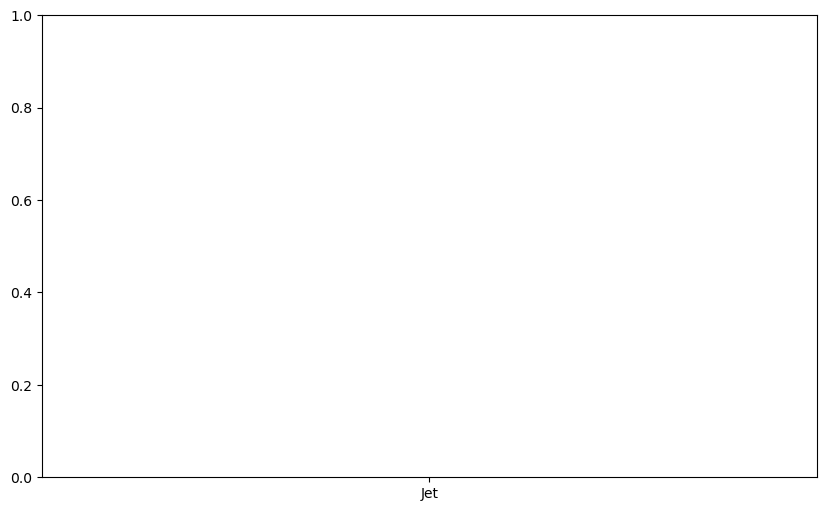

In [61]:
def plot_score(df, measure,subset=None):
    plt.figure(figsize=(10, 6))
    if(subset!=None):
        df = df[df["Class"].isin(subset)]

    # Compute the average score per class and sort by this average
    class_order = df.groupby('Class')[measure].mean().sort_values().index

    # Sort the DataFrame by the class order for plotting
    df['Class'] = pd.Categorical(df['Class'], categories=class_order, ordered=True)

    sns.barplot(data=df, x='Class', y=measure, hue='Model', palette=["lightsteelblue","orangered","cornflowerblue","darkorange","royalblue","gold"])

    plt.title(f'{measure} by Class')
    plt.ylim(0, 1)  # Assuming metrics are between 0 and 1
    plt.ylabel('Score')
    plt.xticks(rotation=90)  # Rotate class labels for better readability

    plt.legend(title='Distance Measure')
    plt.show()

plot_score(combined_df,"F1", subset=["PlantIndoors","HumanHead","Chess","Sword","Biplane","Hand","Quadruped","Tool","Door","Jet"]  # replace with the actual class names you want to include
)



C:\Users\Efraim\AppData\Local\Temp\ipykernel_16700\3887763926.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Class'] = pd.Categorical(df['Class'], categories=class_order, ordered=True)


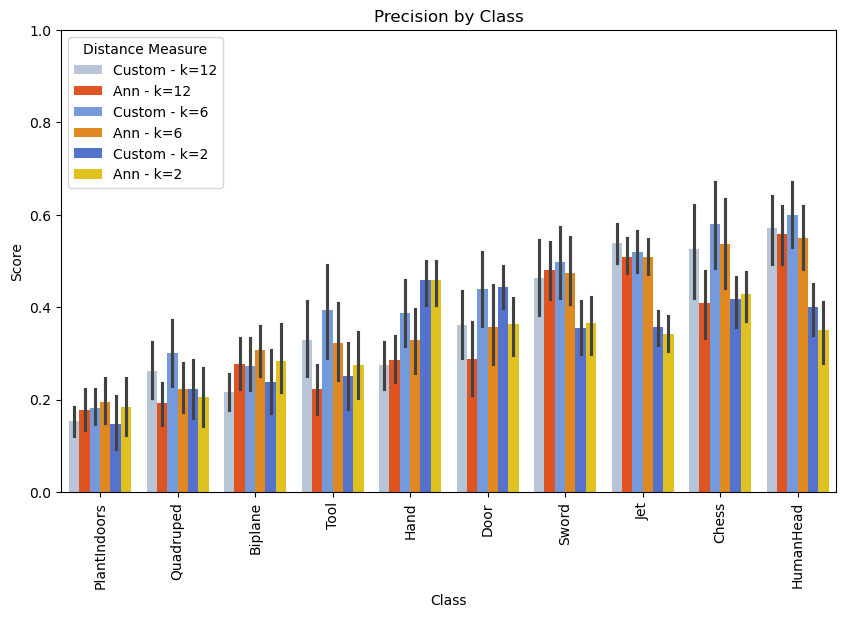

C:\Users\Efraim\AppData\Local\Temp\ipykernel_16700\3887763926.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Class'] = pd.Categorical(df['Class'], categories=class_order, ordered=True)


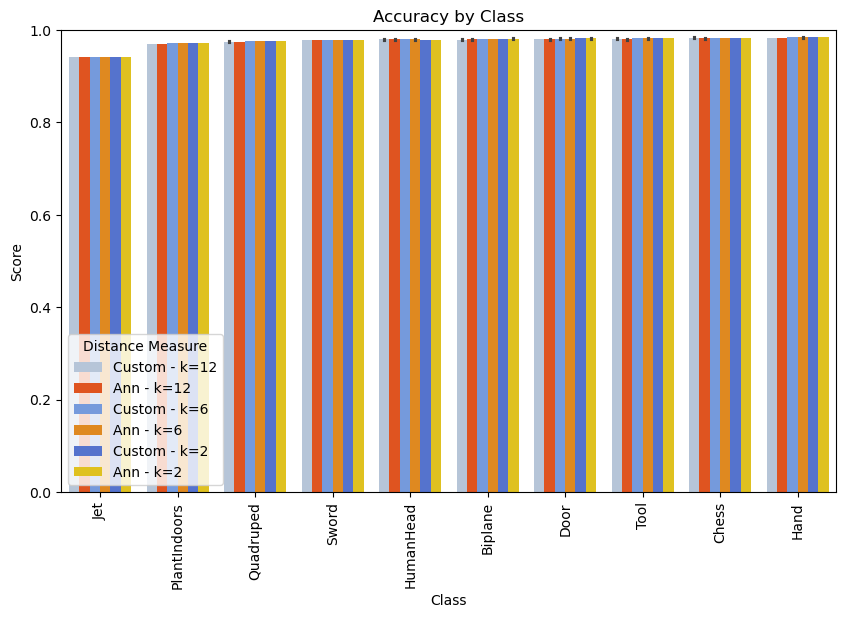

C:\Users\Efraim\AppData\Local\Temp\ipykernel_16700\3887763926.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Class'] = pd.Categorical(df['Class'], categories=class_order, ordered=True)


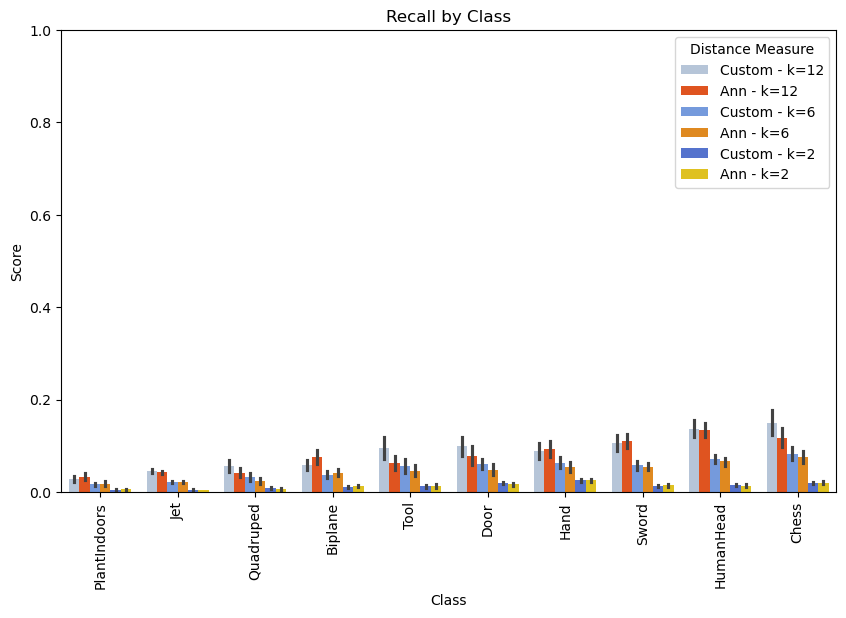

In [51]:
plot_score(combined_df,"Precision", subset=["PlantIndoors","HumanHead","Chess","Sword","Biplane","Hand","Quadruped","Tool","Door","Jet"]  # replace with the actual class names you want to include
)
plot_score(combined_df,"Accuracy", subset=["PlantIndoors","HumanHead","Chess","Sword","Biplane","Hand","Quadruped","Tool","Door","Jet"]  # replace with the actual class names you want to include
)
plot_score(combined_df,"Recall", subset=["PlantIndoors","HumanHead","Chess","Sword","Biplane","Hand","Quadruped","Tool","Door","Jet"]  # replace with the actual class names you want to include
)

C:\Users\Efraim\AppData\Local\Temp\ipykernel_16700\3887763926.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Class'] = pd.Categorical(df['Class'], categories=class_order, ordered=True)


ValueError: cannot reindex on an axis with duplicate labels

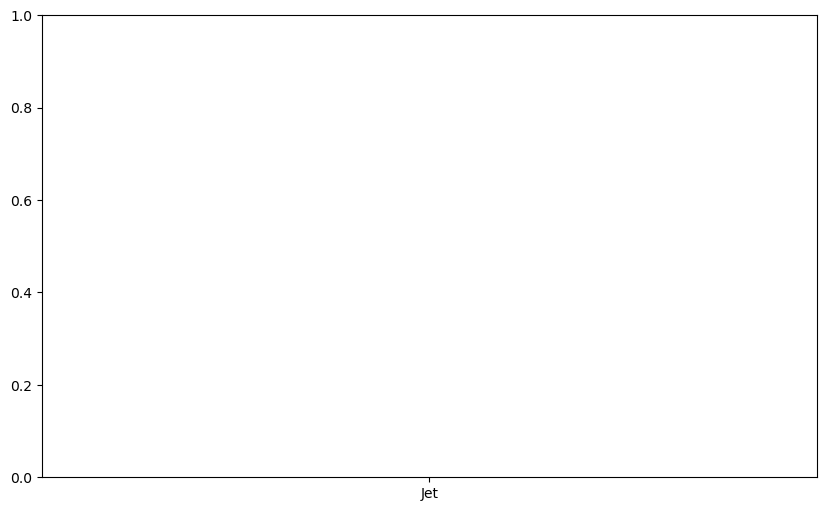

In [57]:
plot_score(combined_df,"F1", subset=["PlantIndoors","HumanHead","Chess","Sword","Biplane","Hand","Quadruped","Tool","Door","Jet"]  # replace with the actual class names you want to include
)

In [55]:
for i in ["Accuracy","Precision","Recall","F1"]:
    r1 = np.around(truthTable_k12[i].mean(),decimals=4)
    r2 = np.around(truthTable_k12_ann[i].mean(),decimals=4)
    r3 = np.around(truthTable_k6[i].mean(),decimals=4)
    r4 = np.around(truthTable_k6_ann[i].mean(),decimals=4)
    r5 = np.around(truthTable_k2[i].mean(),decimals=4)
    r6 = np.around(truthTable_k2_ann[i].mean(),decimals=4)
    print(f"{i} - Custom-12:  {r1}; Custom-6: {r3}; Custom-2 {r5}; ANN-12: {r2},  ANN-6:{r4}, , ANN-2 {r6}")


Accuracy - Custom-12:  0.976; Custom-6: 0.9774; Custom-2 0.978; ANN-12: 0.9758,  ANN-6:0.9773, , ANN-2 0.978
Precision - Custom-12:  0.2537; Custom-6: 0.2827; Custom-2 0.2329; ANN-12: 0.232,  ANN-6:0.2561, , ANN-2 0.2164
Recall - Custom-12:  0.0678; Custom-6: 0.0393; Custom-2 0.0114; ANN-12: 0.0624,  ANN-6:0.0358, , ANN-2 0.0107
F1 - Custom-12:  0.1302; Custom-6: 0.0977; Custom-2 0.0461; ANN-12: 0.1217,  ANN-6:0.0908, , ANN-2 0.0463
